In [1]:
import ale

from knoten import csm
from knoten import csmapi
from ale.drivers.cassini_driver import CassiniISS
from ale.drivers import JsonEncoder
import matplotlib.pyplot as plt
import ctypes

import shapely.wkt

lib = ctypes.CDLL('/home/kberry/anaconda3/envs/ALE/lib/libusgscsm.so')

In [27]:
import json, os

cassini_iss_wac = '/home/kberry/dev/ale/ale/N1597182735_2.LBL' #"/scratch/localhome/kberry/dev/ale/ale/W1472855646_5.LBL"

driver = CassiniISS(cassini_iss_wac)

with driver as d:
  #  print("Corrected Starting Ephem 2 UTC: ", spice.et2utc(d.starting_ephemeris_time, "ISOC", 100))
  #  print("Corrected Start Time from label: ", ["label"]["CORRECTED_START_TIME"])
    aledict = d.to_dict() # dump this to a json file -> this is the ISD
    # goal = get an initial dict working for a PR
    # check out the json encoder driver
print(aledict)

# Next step: actually use the ISD in the CSM? 

# export python dictionary ISD to actual JSON ISD format
alelabel = os.path.splitext(cassini_iss_wac)[0]+".json"
json.dump(aledict, open(alelabel, "w"), cls=JsonEncoder) #why doesn't this have newlines? is it the cls-specified encoder


# Setup to make a csm camera model
model="USGS_ASTRO_FRAME_SENSOR_MODEL"
plugin = csmapi.Plugin.getList()[0]
isd = csmapi.Isd(alelabel)

# Use plugin to construct a camera
camera = plugin.constructModelFromISD(isd, model)

nlines, nsamples = aledict["image_lines"], aledict["image_samples"]

boundary = csm.generate_boundary((nlines, nsamples))

geom = csm.generate_latlon_footprint(camera, boundary, aledict['radii']['semimajor'], aledict['radii']['semiminor'])


SpiceyError: 
================================================================================

Toolkit version: N0066

SPICE(NOFRAMECONNECT) --

At epoch 2.7176129615881E+08 TDB (2008 AUG 11 21:14:56.158 TDB), there is insufficient information available to transform from reference frame -82360 (CASSINI_ISS_NAC) to reference frame 10040 (IAU_ENCELADUS). Frame CASSINI_ISS_NAC could be transformed to frame -82000 (CASSINI_SC_COORD). The latter is a CK frame; a CK

pxform_c --> PXFORM --> REFCHG

================================================================================

In [4]:
aledict['radii']['semimajor']

60268.0

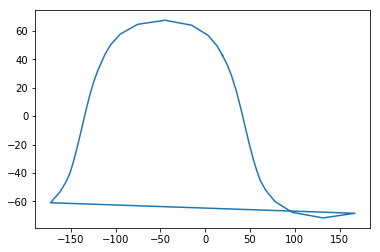

In [25]:
lons, lats, alts = csm.generate_latlon_boundary(camera, boundary, aledict['radii']['semimajor'], aledict['radii']['semiminor'])
plt.plot(lons, lats)

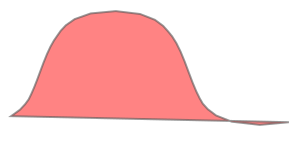

In [23]:
wkt = geom.ExportToWkt()
ale_driver_geom = shapely.wkt.loads(wkt)
ale_driver_geom.geoms[0]

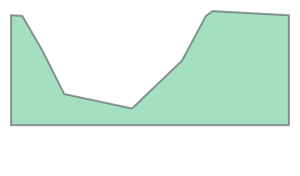

In [21]:
isis_wkt = "MULTIPOLYGON (((156.6477561820489370 -68.3065130138084129, 221.5423909035006602 -6.2037340484827084, 252.3615598312090071 51.5651996221523206, 261.0208551939051063 57.8672829252680927, 360.0000000000000000 52.5190886410770901, 360.0000000000000000 -61.0018134530374851, 360.0000000000000000 -90.0000000000000000, 0.0000000000000000 -90.0000000000000000, 0.0000000000000000 -61.0018134530374851, 0.0000000000000000 52.5190886410770901, 14.3764000984336651 51.7422807490275787, 40.3363495347557972 7.2549787943348685, 68.8382610387429992 -49.6359854643225589, 156.6477561820489370 -68.3065130138084129)))"
isis_geom = shapely.wkt.loads(isis_wkt)
isis_geom.geoms[0]

In [16]:
# compare ISIS WKT to CSM WKT using shapely



#'INS{}_FOV_{}CENTER_{}PIXEL{}'.format('-10', '99', '', 'https://')